**Web scraping (how to get data...)**

Data: Chicago Marathon 2025 Results

Begin with this in web browser:

URL: https://results.chicagomarathon.com/2025/?pid=list

In [2]:
import requests # HTTP
from bs4 import BeautifulSoup 
import pandas as pd

url = 'https://results.chicagomarathon.com/2025/?pid=list'
# url = 'https://results.chicagomarathon.com/2025/?pid=list&num_results=1000'
# make an HTTP request to get the URL, store the response
response = requests.get(url)
print(response)



<Response [200]>


Let's examine the data (webpage) returned from the response.

In [24]:
# response.content is the HTML returned from the webserver
# print(response.content)

# tokenize the response using the BS parser
# 'soup' is parse tree which DOM of the web page
soup = BeautifulSoup(response.content, 'html.parser')

# search for the "li" tag with "list-group-item" class
rows = soup.findAll('li', attrs={'class':'list-group-item'})
# print(rows)
row = rows[2+4] # process one row to exame it more closely
# print(row)
values = [ x.text for x in row.findAll('div')]
print(values)
# we need flatten this list; remove the \n (line breaks)
s = ''.join(values) # joining all list items together into one string
# print(s)
values = s.split() # split the string based on white space
print(values)

# let's look at each list item in values and its index:
print(f'Found {len(values)} fields.')
for i in range(len(values)):
    print(f'{i}: {values[i]}')

# extract fields, package into a dictionary
d = {
    'place': values[0],
    'last_name': values[2].replace(',',''), # strip the trailing comma 
    'first_name': values[3],
    # 'citizenship': values[4],
    # 'bib': values[11][3:], # slice from index 3 to the end
    # 'division': values[12][8:], # slice from index 8 to the end
    # 'first_half': values[25][4:],  # slice from index 4 to the end
    # 'finish': values[26][7:],  # slice from index 7 to the end
    'citizenship': values[-19],
    'bib': values[-10][3:], # slice from index 3 to the end
    'division': values[-9][8:], # slice from index 8 to the end
    'first_half': values[-3][4:],  # slice from index 4 to the end
    'finish': values[-2][7:],  # slice from index 7 to the end
}
print(d)


['\n\n5\n5\nEsa, Huseydin Mohamed (ETH)\n\n', '\n5\n5\nEsa, Huseydin Mohamed (ETH)\n', '5', '5', '\n\n\nBIB9\nDivision25-29\n\n\n\n\nTime–\nHALF01:02:19\nFinish02:04:49\n\n\n\n', '\n\nBIB9\nDivision25-29\n\n', '\nBIB9\nDivision25-29\n', 'BIB9', 'BIB', 'Division25-29', 'Division', '\n\nTime–\nHALF01:02:19\nFinish02:04:49\n\n\n', '\nTime–\nHALF01:02:19\nFinish02:04:49\n\n', 'Time–', 'Time', 'HALF01:02:19', 'HALF', 'Finish02:04:49', 'Finish', '']
['5', '5', 'Esa,', 'Huseydin', 'Mohamed', '(ETH)', '5', '5', 'Esa,', 'Huseydin', 'Mohamed', '(ETH)', '55', 'BIB9', 'Division25-29', 'Time–', 'HALF01:02:19', 'Finish02:04:49', 'BIB9', 'Division25-29', 'BIB9', 'Division25-29', 'BIB9BIBDivision25-29Division', 'Time–', 'HALF01:02:19', 'Finish02:04:49', 'Time–', 'HALF01:02:19', 'Finish02:04:49', 'Time–TimeHALF01:02:19HALFFinish02:04:49Finish']
Found 30 fields.
0: 5
1: 5
2: Esa,
3: Huseydin
4: Mohamed
5: (ETH)
6: 5
7: 5
8: Esa,
9: Huseydin
10: Mohamed
11: (ETH)
12: 55
13: BIB9
14: Division25-29
15: Tim

Now we can the entire web page (i.e., all rows):

(USA)    11
(KEN)     6
(ETH)     3
(UGA)     1
(CAN)     1
(BEL)     1
(MAR)     1
(JPN)     1
Name: citizenship, dtype: int64


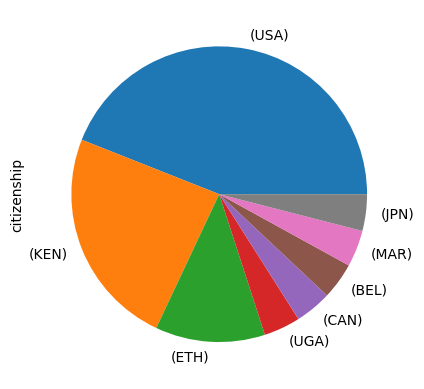

In [ ]:
# tokenize the response using the BS parser
# 'soup' is parse tree which DOM of the web page
soup = BeautifulSoup(response.content, 'html.parser')

# search for the "li" tag with "list-group-item" class
rows = soup.findAll('li', attrs={'class':'list-group-item'})
# print(rows)

# accumulator pattern:
results = []

# iterate over all rows, starting at index 2:
for row in rows[2:]: 

    values = [ x.text for x in row.findAll('div')]
    # print(values)
    # we need flatten this list; remove the \n (line breaks)
    s = ''.join(values) # joining all list items together into one string
    # print(s)
    values = s.split() # split the string based on white space
    # print(values)

    # let's look at each list item in values and its index:
    # for i in range(len(values)):
    #     print(f'{i}: {values[i]}')

    # extract fields, package into a dictionary
    d = {
        'place': values[0],
        'last_name': values[2].replace(',',''), # strip the trailing comma 
        'first_name': values[3],
        # 'citizenship': values[4],
        # 'bib': values[11][3:], # slice from index 3 to the end
        # 'division': values[12][8:], # slice from index 8 to the end
        # 'first_half': values[25][4:],  # slice from index 4 to the end
        # 'finish': values[26][7:],  # slice from index 7 to the end
        'citizenship': values[-19],
        'bib': values[-10][3:], # slice from index 3 to the end
        'division': values[-9][8:], # slice from index 8 to the end
        'first_half': values[-3][4:],  # slice from index 4 to the end
        'finish': values[-2][7:],  # slice from index 7 to the end
    }
    # print(d)
    results.append(d) # accumulate this dictionary into the results list

# done with loop!
# print(results)
# create a DataFrame
df = pd.DataFrame(results)
df.to_csv('chicago_results.csv') # save to disk
#print(df)

# now that we have a data frame, we can do all the (usual) data frame operations
df['citizenship'].value_counts().plot.pie()
# print(df['citizenship'].value_counts())
